<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/2023-2/notebooks/5d_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reducción de dimensiones mediante análisis de componentes principales (ACP)
En esta libreta exploraremos la reducción de dimensiones con análisis de componentes principales (ACP). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

## Definición
Dado un conjunto de ejemplos $\mathbf{X} = \{\mathbf{x}^{(i)} \in \mathbb{R}^d\mid i = 1, \ldots, n\}$, el análisis de componentes principales busca encontrar los vectores $\mathbf{u}_1, \ldots, \mathbf{u}_K$, donde K es usualmente mucho menor a $d$ que maximicen la varianza. 

Esto puede lograrse obteniendo los $K$ eigenvectores con mayor eigenvalor $\lambda_1, \ldots, \lambda_K$ de la matriz de covarianza $\boldsymbol{\Sigma}$, definida por

$
\boldsymbol{\Sigma} = \frac{1}{n - 1}\sum_{i=1}^n
(\mathbf{x}^{(i)} - \boldsymbol{\mu}) (\mathbf{x}^{(i)} - \boldsymbol{\mu})^\top
$

Los $K$ eigenvectores se conocen como componentes principales.

In [2]:
class PCA:
  def __init__(self, n_components):
    self.n_components_ = n_components

  def fit(self, X):
    self.means_ = X.mean(axis=0)
    devs = X - self.means_
    
    cov = (devs.T @ devs) / (X.shape[0] - 1)
    l, u = np.linalg.eig(cov)

    lts = l.argsort()[::-1]
    u = u[:, lts]
    l = l[lts]
    
    self.components_ = u[:, :self.n_components_]
    self.vars_ = l[:self.n_components_]

  def transform(self, X):
    return (X - self.means_) @ self.components_

  def inverse_transform(self, X_reduced):
    return X_reduced @ self.components_.T + self.means_

## Conjunto de datos de Iris
Apliquemos el PCA que acabamos de programar en conjunto de datos de flores iris. Elegimos los atributos de ancho y largo sepal y visualizamos el conjunto.

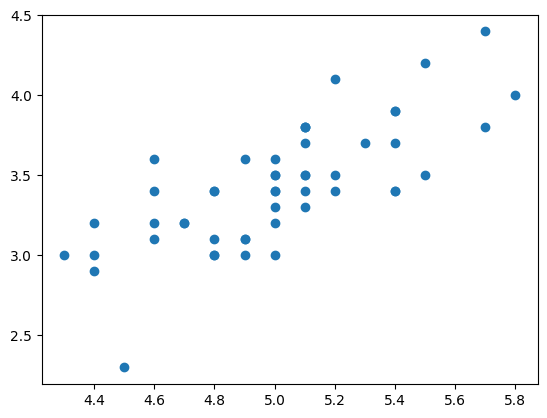

In [3]:
iris = datasets.load_iris()
p2d = iris['data'][:,:2]
p2d = p2d[iris['target']==0]
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
plt.show()

Encontramos sus 2 componentes principales

In [4]:
pca2d = PCA(2)
pca2d.fit(p2d)

Visualizamos los componentes principales encontrados

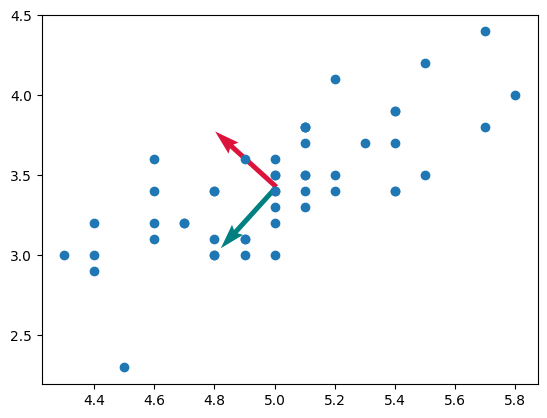

In [5]:
plt.plot(p2d[:, 0], p2d[:, 1], 'o')
colors = ['teal', 'crimson']
for c,u in zip(colors, pca2d.components_):
   plt.quiver(pca2d.means_[0], pca2d.means_[1], u[0], u[1], width=0.01, 
              scale=6,
              color=c)
plt.show()

In [6]:
print(pca2d.components_)
print(pca2d.vars_)

[[-0.67174957 -0.74077832]
 [-0.74077832  0.67174957]]
[0.23366074 0.03427804]


Reducimos dimensiones del conjunto de ejemplos de 3 (ancho y largo del sépalo y ancho del pétalo). 

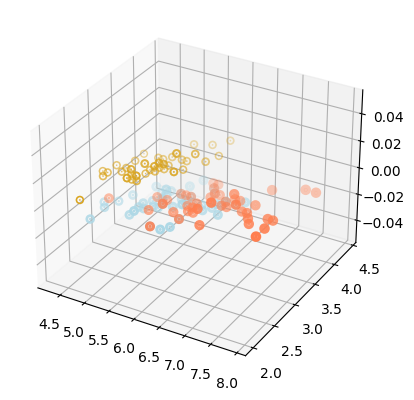

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

iris = datasets.load_iris()
p3d = iris['data'][:, :3]

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  plt.scatter(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 2], lw=5, color=c)

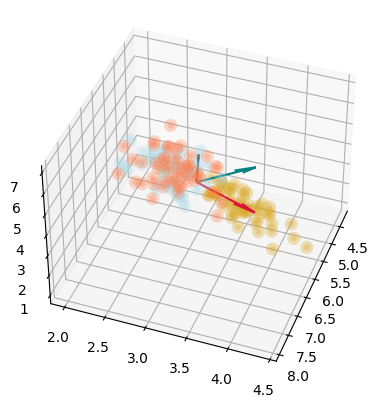

In [8]:
pca3d = PCA(3)
pca3d.fit(p3d)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colores=['goldenrod', 'lightblue', 'coral']
for i,c in enumerate(colores):
  ax.scatter(p3d[iris['target']==i,0], p3d[iris['target']==i, 1], p3d[iris['target']==i, 2], lw=5, color=c, alpha=0.3)
  
colors = ['teal', 'crimson', 'black']
for c,u in zip(colors, pca3d.components_):
   ax.quiver(pca3d.means_[0], pca3d.means_[1], pca3d.means_[2], u[0], u[1], u[2], color=c)

ax.view_init(elev=40, azim=20)
plt.show()

In [9]:
print(pca3d.components_)
print(pca3d.vars_)

[[-0.38983343  0.63922328  0.66289026]
 [ 0.09100801  0.74305866 -0.66300933]
 [-0.91637735 -0.19813487 -0.34784355]]
[3.69111979 0.24137727 0.05945372]


In [10]:
pca3d_2c = PCA(2)
pca3d_2c.fit(p3d)
print(pca3d_2c.components_)
print(pca3d_2c.vars_)

[[-0.38983343  0.63922328]
 [ 0.09100801  0.74305866]
 [-0.91637735 -0.19813487]]
[3.69111979 0.24137727]


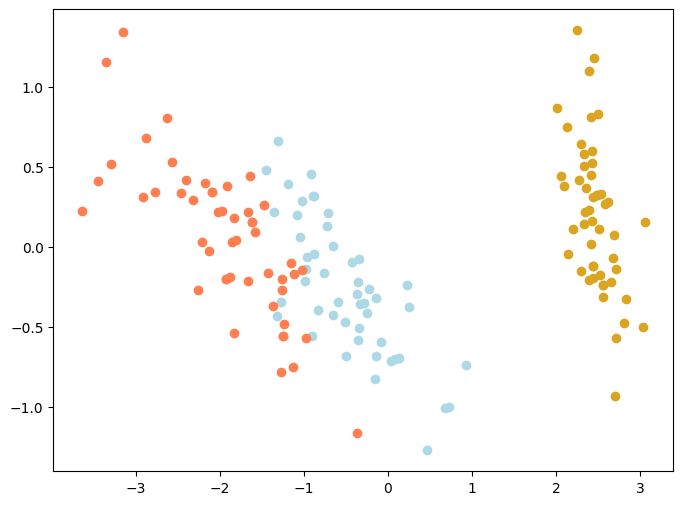

In [11]:
proj = pca3d_2c.transform(p3d)

fig = plt.figure(1, figsize=(8, 6))
for i,c in enumerate(colores):
  plt.plot(proj[np.where(iris['target']==i), 0],
           proj[np.where(iris['target']==i), 1],
           'o', color=c)
plt.show()

Comparamos los resultados con scikit-learn

In [12]:
from sklearn.decomposition import PCA as SKPCA

skpca = SKPCA(n_components=2)
skpca.fit(p3d)

print(skpca.components_.T)
print(skpca.explained_variance_)

[[ 0.38983343  0.63922328]
 [-0.09100801  0.74305866]
 [ 0.91637735 -0.19813487]]
[3.69111979 0.24137727]


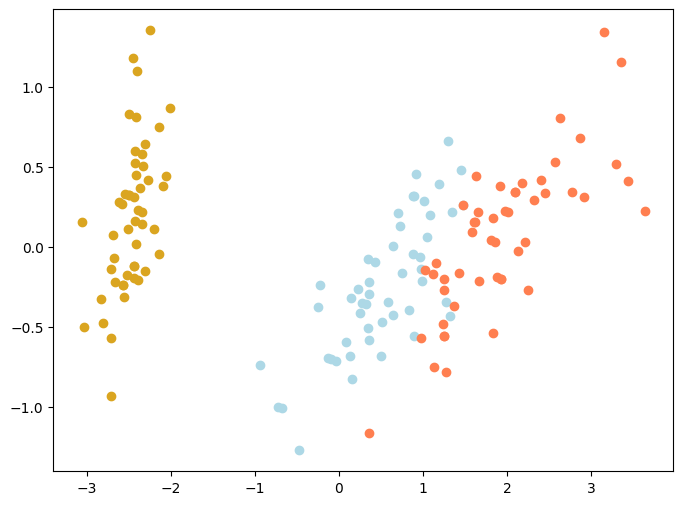

In [13]:
skproj = skpca.transform(p3d)

fig = plt.figure(1, figsize=(8, 6))
for i,c in enumerate(colores):
  plt.plot(skproj[np.where(iris['target']==i), 0],
           skproj[np.where(iris['target']==i), 1],
           'o', color=c)
plt.show()

## Conjunto de datos de imágenes de dígitos
Cargamos y visualizamos algunos ejemplos del conjunto de imágenes de dígitos

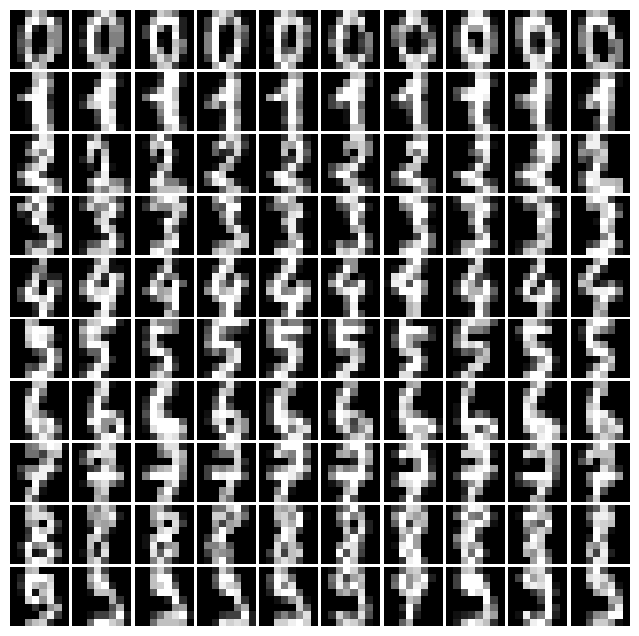

In [14]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec


def show_images(images, targets, n_targets=False, n_samples=10, imshape=(8,8), figsize=(8,8)):
  n_targets = n_targets if n_targets else targets.max() + 1

  plt.figure(figsize=figsize)
  gs = gridspec.GridSpec(n_targets, n_samples)
  gs.update(wspace=0.05, hspace=0.05)
  for i in range(n_targets):
    target_spec_imgs = images[targets==i]
    for j in range(n_samples):
      ax = plt.subplot(gs[i * n_samples + j])
      ax.imshow(target_spec_imgs[j].reshape(imshape), cmap=plt.cm.gray, interpolation='nearest')
      ax.axis('off')
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.set_aspect('equal')
  plt.show()

db = load_digits()
show_images(db.images, db.target)

Aplicamos PCA con 2 componentes a este conjunto

In [15]:
imgs = db['data']
impca2 = PCA(2)
impca2.fit(imgs)
reduced2 = impca2.transform(imgs)

Visualizamos los datos proyectados en el subespacio

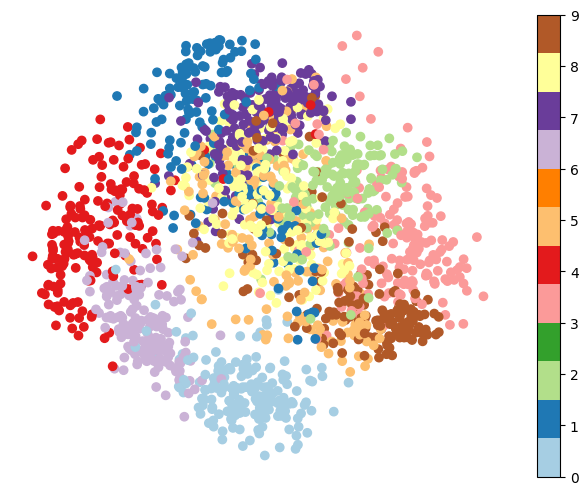

In [16]:
fig = plt.figure(1, figsize=(8, 6))
plt.scatter(reduced2[:, 0], reduced2[:, 1], c=db.target, cmap="Paired")
plt.colorbar()
plt.axis('off')
plt.show()

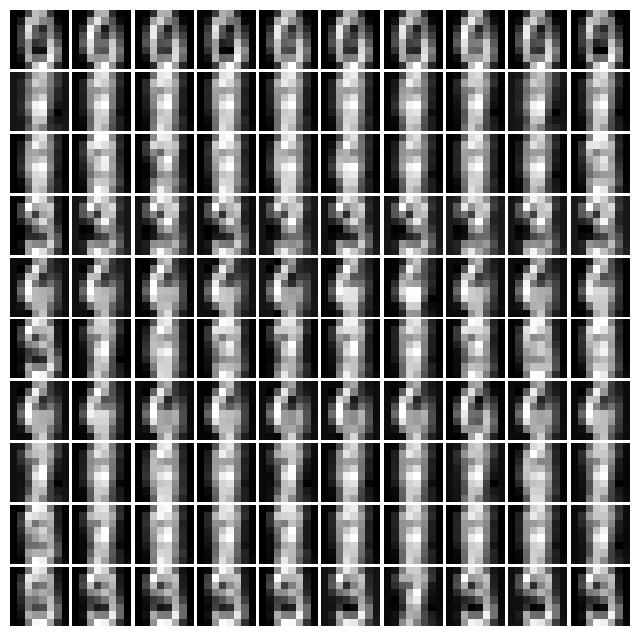

In [17]:
rec2 = impca2.inverse_transform(reduced2)
show_images(rec2.reshape(rec2.shape[0], 8, 8), db.target)

Aplicamos PCA con 40 componentes para comparar las reconstrucciones

In [ ]:
impca40 = PCA(40)
impca40.fit(imgs)
reduced40 = impca40.transform(imgs)
rec40 = impca40.inverse_transform(reduced40)
show_images(rec40.reshape(rec40.shape[0], 8, 8), db.target)

Una estrategia para elegir el número $K$ de componentes principales es analizar el porcentaje de la varianza explicada. Visualicemos el radio de la varianza explicada por cada componente y su porcentaje acumulado.Podemos observar que los primeros 21 componentes principales explican más del 90% de la varianza.

In [ ]:
m = PCA(64)
m.fit(imgs)
percent = (m.vars_.cumsum() / m.vars_.sum()) * 100

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(np.arange(1,65,1), m.vars_ / m.vars_.sum())
plt.xlabel(u'Número de componentes')
plt.ylabel(u'Radio de varianza explicada')

plt.subplot(1,2,2)
plt.plot(np.arange(1,65,1), percent)
plt.xlabel(u'Número de componentes')
plt.ylabel(u'Porcentaje de varianza explicada')
plt.axvline(x=np.argwhere(percent>=90)[0] + 1, ymin=0, ymax=0.86, color='salmon',alpha=0.5, ls='--')
plt.axhline(y=percent[np.argwhere(percent>=90)][0], xmin=0, xmax=0.33, color='salmon', alpha=0.5, ls='--')
plt.yticks([0,20,40,60,80,90,100])
plt.show()

## Reconocimiento de rostros con PCA
Ahora vamos a explorar un método sencillo de reconocimiento de rostros usando PCA, conocido como _eigenfaces_. 

Primero cargamos el conjunto de imágenes de rostros de Olivetti Research Laboratory, el cual contiene imágenes de $64\times 64$ de 40 sujetos distintos. 

Visualicemos las imágenes de 10 sujetos.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

orl  = fetch_olivetti_faces()
show_images(orl.images, orl.target, n_targets=10, imshape=orl.images[0].shape)

Dividimos el conjunto en subconjuntos de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(orl.data, orl.target, test_size=0.3, random_state=42)

Tomemos dos imágenes de un mismo rostro y de dos rostros distintos y comparémoslas.

In [ ]:
plt.subplot(2,2,1)
plt.imshow(X_train[y_train==3][0].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(X_train[y_train==3][4].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(X_train[y_train==3][0].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(X_train[y_train==0][1].reshape(64, 64), cmap='gray')
plt.axis('off')
plt.show()

Convertimos las imágenes a vectores de 4096 dimensiones y calculamos la distancia euclidiana entre ambos pares. 

In [ ]:
dist_sub3_to_sub3 = np.linalg.norm(X_test[y_test==3][2] - X_test[y_test==3][3])
dist_sub3_to_sub4 = np.linalg.norm(X_test[y_test==3][0] - X_test[y_test==4][1])
print(dist_sub3_to_sub3)
print(dist_sub3_to_sub4)

Como podemos observar la distancia entre las imágenes del mismo rostro es mayor a la de rostros distintos en el espacio de píxeles, por lo que no sería adecuado para el reconocimiento usar esta representación. Una forma más adecuada de representar las imágenes de los rostros es a través de sus componentes principales.

Apliquemos PCA a nuestro conjunto y visualicemos los componentes principales (_eigenfaces_).

In [ ]:
eigenfaces = PCA(20)
eigenfaces.fit(X_train)
X_test_proj = eigenfaces.transform(X_test)

Calculemos la distancia euclidiana de las proyecciones de las imágenes anteriores.

In [ ]:
dist_sub3_to_sub3_proj = np.linalg.norm(X_test_proj[y_test==3][2] - X_test_proj[y_test==3][3])
dist_sub3_to_sub4_proj = np.linalg.norm(X_test_proj[y_test==3][0] - X_test_proj[y_test==4][1])
print(dist_sub3_to_sub3_proj)
print(dist_sub3_to_sub4_proj)

Visualizamos las _eigenfaces_.

In [ ]:
for i in range(eigenfaces.n_components_):
  plt.subplot(4, 5, i+1)
  plt.imshow(eigenfaces.components_.T[i].reshape(64, 64), cmap='gray')
  plt.axis('off')
  
plt.show()

Finalmente comparamos ambas representaciones para reconocimiento de rostros entrenando y evaluando clasificadores basados en máquinas de vectores de soporte.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

px_scores = []
ef_scores = []

cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5)
for train_index, test_index in cv.split(orl.data, orl.target):
  c1 = SGDClassifier()
  c1.fit(orl.data[train_index], orl.target[train_index])
  px_scores.append(c1.score(orl.data[test_index], orl.target[test_index]))

  ef = PCA(50)
  ef.fit(orl.data[train_index])
  train_proj = ef.transform(orl.data[train_index])
  test_proj = ef.transform(orl.data[test_index])
  
  c2 = SGDClassifier()
  c2.fit(train_proj, orl.target[train_index])
  ef_scores.append(c2.score(test_proj, orl.target[test_index]))

print('Exactitud clasificadores con píxeles: {0} (std = {1})'.format(np.mean(px_scores), np.std(px_scores)))
print('Exactitud clasificadores con eigenfaces: {0} (std = {1})'.format(np.mean(ef_scores), np.std(ef_scores)))